# A. Final Project 2 kelompok 3
---
### Anggota kelompok : <br>
<ol>
<li>Alif Faqiih             PYTN-KS12-024</li>
<li>Syarif Khoirul Al Fian  PYTN-KS12-009</li>
<li>Marcel Afandi           PYTN-KS12-018</li>
<ol>



### Data

<p style='text-align: justify;'>
    Dataset yang digunakan yaitu <b>Rain in Australia</b> yang berisi record data hujan harian selama 10 tahun di Australia. Kolom RainTomorrow adalah target variable yang mau diprediksi. Jika “Yes” maka besok harinya disana hujan 1mm atau lebih. Dataset ini memiliki 23 atribut, antara lain: </p>

- Date: tanggal hari itu
- Location: lokasi, nama kota di Australia
- MinTemp: temperatur terendah hari itu dalam celcius
- MaxTemp: temperatur tertinggi hari itu dalam celcius
- Rainfall: jumlah curah hujan hari itu dalam mm
- Evaporation: jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu
- Sunshine: jumlah jam hari itu cerah dengan cahaya matahari
- WindGustDir: arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam hari itu
- WindGustSpeed: kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu
- WindDir9am: arah angin jam 9 pagi
- WindDir3pm: arah angin jam 3 sore
- WindSpeed9am: kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
- WindSpeed3pm: kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
- Humidity9am: humiditas jam 9 pagi dalam persen
- Humidity3pm: humiditas jam 3 sore dalam persen
- Pressure9am: tekanan udara jam 9 pagi dalam hpa
- Pressure3pm: tekanan udara jam 3 sore dalam hpa
- Cloud9am: persentase langit yang tertutup awan jam 9 pagi. dihitung dalam oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan.
- Cloud3pm: persentase langit yang tertutup awan jam 3 sore
- Temp9am: temperatur jam 9 pagi dalam celcius
- Temp3pm: temperatur jam 3 sore dalam celcius
- RainToday: apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi melebihi 1mm, maka nilai ini adalah 1, jika tidak maka 0.



### Objective
Objective yang ingin dicapai dalam analisis ini, yaitu:
- Mengetahui faktor-faktor yang berpengaruh signifikan dalam memprediksi hujan di Australia.
- Menemukan model terbaik untuk digunakan dalam memprediksi hujan di Australia.
- Memberikan insight yang dapat membantu pihak penduduk dalam bentuk charts.

# B. Library yang dibutuhkan

In [1]:
# Load Data
import pandas as pd
import numpy as np

# Visualisasi Data
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Preprocessing dan Modeling 
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier # DecisionTreeClassifier
from sklearn import svm # SVM
from sklearn.feature_selection import SequentialFeatureSelector as SFS # SVM

# Untuk menampilkan hasil Scorring
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# C. Data Loading

In [2]:
data = pd.read_csv("D:\\\\semester 6\\proakh\\weatherAUS.csv")

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
data.shape

(145460, 23)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# D. Data Cleaning

In [6]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [7]:
data.drop("Date", axis=1, inplace=True)

In [8]:
#Mencari kolom yang bertipe data selain object
numerical = [var for var in data.columns if data[var].dtype!='O']
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [9]:
#Mengisi numerical variables dengan median
data = data.fillna(data.median())
data.isna().sum()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23076\1191230433.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.median())


Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

## Menghapus Categorical Value yang mempunyai missing values

In [10]:
# Menghilangkan missing values pada kolom WindGustDir, WindDir9am, WindDir3pm, RainToday, RainTomorrow
data.dropna(subset=['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow'], axis=0, inplace=True)

In [11]:
data.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

### Mengecek Outliers

In [12]:
print(round(data[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  123710.0  123710.0  123710.0     123710.0  123710.0       123710.0   
mean       12.0      23.0       2.0          5.0       8.0           41.0   
std         6.0       7.0       9.0          3.0       3.0           13.0   
min        -8.0      -5.0       0.0          0.0       0.0            7.0   
25%         8.0      18.0       0.0          4.0       8.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      29.0       1.0          6.0       9.0           48.0   
max        34.0      48.0     368.0         86.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      123710.0      123710.0     123710.0     123710.0     123710.0   
mean           15.0          19.0         68.0         51.0       1017.0   
std             8.0           9.0         19.0         21.0          7.0   
mi

### Mencari Outliers

Text(0, 0.5, 'RainTomorrow')

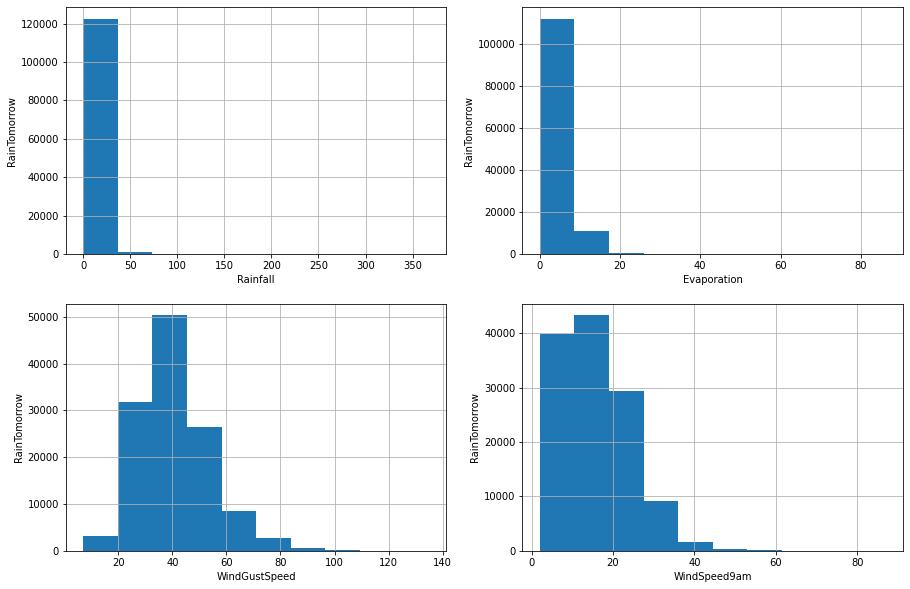

In [13]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = data.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = data.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = data.WindGustSpeed.hist(bins=10)
fig.set_xlabel('WindGustSpeed')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = data.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


Text(0, 0.5, 'RainTomorrow')

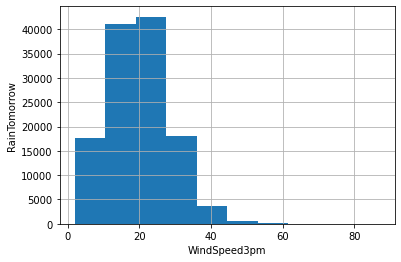

In [14]:
fig = data.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

Menggunakan Interquantile range untuk mencari outliers, karena pada plot diatas didapatkan hasil distribusi skewed 

In [15]:
# Handling outlier menggunakan IQR
Q1 = (data[['Rainfall','Evaporation','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']]).quantile(0.25)
Q3 = (data[['Rainfall','Evaporation','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']]).quantile(0.75)

In [16]:
IQR= Q3-Q1

In [17]:
max = Q3 + (1.5*IQR)
min = Q1 - (1.5*IQR)

In [18]:
print('Nilai Maximum dari masing-masing Variable adalah: ', max)

print('Nilai Minimum dari masing-masing Variable adalah: ', min)

Nilai Maximum dari masing-masing Variable adalah:  Rainfall          2.0
Evaporation       7.7
WindGustSpeed    73.5
WindSpeed9am     36.5
WindSpeed3pm     40.5
dtype: float64
Nilai Minimum dari masing-masing Variable adalah:  Rainfall        -1.2
Evaporation      2.1
WindGustSpeed    5.5
WindSpeed9am    -7.5
WindSpeed3pm    -3.5
dtype: float64


Berdasarkan Handling Outlier diatas didapatkan nilai terbesar dan terkecil dari masing-masing variable

In [19]:
more_than = (data > max)
lower_than = (data < min)
data = data.mask(more_than, max, axis=1)
data = data.mask(lower_than, min, axis=1)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23076\3726912718.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than = (data > max)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23076\3726912718.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than = (data < min)


In [20]:
print('\nPersebaran data setelah ditangani Outlier: ')
print(data[['Rainfall','Evaporation','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']].describe())


Persebaran data setelah ditangani Outlier: 
            Rainfall   Evaporation  WindGustSpeed   WindSpeed9am  \
count  123710.000000  123710.00000  123710.000000  123710.000000   
mean        0.486650       4.89197      40.482237      14.915330   
std         0.793145       1.66876      12.746265       7.985716   
min         0.000000       2.10000       7.000000       2.000000   
25%         0.000000       4.20000      31.000000       9.000000   
50%         0.000000       4.80000      39.000000      13.000000   
75%         0.800000       5.60000      48.000000      20.000000   
max         2.000000       7.70000      73.500000      36.500000   

        WindSpeed3pm  
count  123710.000000  
mean       19.085991  
std         8.292947  
min         2.000000  
25%        13.000000  
50%        19.000000  
75%        24.000000  
max        40.500000  


In [21]:
# Show the values of  RainToday column
data["RainToday"].value_counts()

No     95954
Yes    27756
Name: RainToday, dtype: int64

 # E. Explorating Data

## 1. Data Query

In [22]:
data.tail()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145454,Uluru,3.5,21.8,0.0,4.8,8.4,E,31.0,ESE,E,...,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9,No,No
145455,Uluru,2.8,23.4,0.0,4.8,8.4,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,4.8,8.4,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,4.8,8.4,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,No,No
145458,Uluru,7.8,27.0,0.0,4.8,8.4,SE,28.0,SSE,N,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [23]:
# Menampilkan data query Location Cobar dengan prediksi hujan NO pada 6.0 cloud3pm
data[(data['Location'] == 'Cobar') & (data.RainToday == 'No') & (data.Cloud3pm == 6.0)].head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6052,Cobar,19.4,37.6,0.0,7.7,10.6,NNE,46.0,NNE,NNW,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6054,Cobar,24.2,41.0,0.0,7.7,8.4,WNW,35.0,NW,WNW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
6063,Cobar,25.2,40.5,0.0,7.7,10.3,SW,44.0,W,SW,...,24.0,15.0,1012.4,1009.0,4.0,6.0,31.4,37.8,No,No
6067,Cobar,21.4,37.5,0.0,7.7,6.9,NNE,43.0,ENE,NNE,...,34.0,29.0,1013.1,1009.6,7.0,6.0,26.2,34.1,No,Yes
6091,Cobar,14.5,30.1,0.0,7.7,10.0,S,37.0,S,SE,...,44.0,25.0,1013.2,1010.0,6.0,6.0,17.4,28.4,No,No


In [24]:
# Menampilkan Location Darwin dengan prediksi hujan Yes
data[(data['Location'] == 'Darwin') & (data['RainTomorrow'] == 'Yes')].head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
139195,Darwin,23.8,32.5,0.0,7.2,8.3,ESE,39.0,NW,NNW,...,64.0,55.0,1014.3,1010.3,4.0,2.0,29.1,30.8,No,Yes
139209,Darwin,26.7,34.0,0.0,7.6,10.3,S,57.0,E,N,...,61.0,55.0,1013.3,1008.8,3.0,3.0,30.5,32.6,No,Yes
139216,Darwin,26.5,34.8,0.0,7.6,8.1,N,41.0,NNW,NNW,...,62.0,54.0,1012.5,1008.4,4.0,5.0,30.5,32.6,No,Yes
139217,Darwin,22.1,34.3,2.0,7.7,5.5,E,73.5,S,E,...,83.0,48.0,1013.0,1008.2,7.0,6.0,26.9,34.0,Yes,Yes
139219,Darwin,24.5,30.1,0.4,5.6,1.6,SE,54.0,ENE,W,...,85.0,75.0,1010.2,1007.5,6.0,7.0,27.6,28.9,No,Yes


## 2. Data Grouping

In [25]:
lc = data['Location'].unique()
print(lc)

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'NorahHead'
 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums' 'Walpole'
 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine' 'Uluru']


In [26]:
ct = data['WindDir3pm'].unique()
print(ct)

['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']


In [27]:
# Group Data mencari nilai wilayah dengan curah hujan tertinggi pada WindDir3pm
# Grouping dengan fitur Rainfall
gp1 = data.groupby(['Location', 'WindDir3pm'])['Rainfall'].sum()
print(gp1)

Location  WindDir3pm
Adelaide  E             20.4
          ENE           15.8
          ESE           16.0
          N             28.8
          NE            20.4
                        ... 
Woomera   SSW           70.7
          SW            56.6
          W             55.8
          WNW           25.4
          WSW           41.4
Name: Rainfall, Length: 752, dtype: float64


In [28]:
#Membandingkan wilayah dengan Temperature paling tinggi adalah Woomera
data.groupby(by=["Location"]).agg({'MaxTemp' : 'max'})

,MaxTemp
Location,
Adelaide,45.7
Albury,44.8
AliceSprings,44.9
BadgerysCreek,46.4
Ballarat,44.1
Bendigo,45.4
Brisbane,38.9
Cairns,38.6
Canberra,41.6


In [29]:
#Melihat wilayah dengan Temperature paling rendah adalah Canberra
data.groupby(by=["Location"]).agg({'MinTemp' : 'min'})

,MinTemp
Location,
Adelaide,0.7
Albury,-2.8
AliceSprings,-5.2
BadgerysCreek,-1.9
Ballarat,-5.6
Bendigo,-4.0
Brisbane,2.6
Cairns,9.3
Canberra,-7.6


## 3. Variability

In [30]:
# Variance
var = np.var(data['Rainfall'], ddof=1)
print("Variance dari Rainfall: ", var)
# Standard Deviation
std = np.std(data['Rainfall'], ddof=1)
print("Standard Deviasi dari Rainfall: ", std)
# Skewness
s = data['Rainfall']
s.skew()
print("Skewness: ", s.skew())
# Ranges
range = np.ptp(s)
print("Range: ", range)

Variance dari Rainfall:  0.6290789098244142
Standard Deviasi dari Rainfall:  0.7931449488110065
Skewness:  1.23550674311566
Range:  2.0


## 4. Central Tendency

In [31]:
# Mencari Nilai Rata-rata dari Rainfall
mean = data['Rainfall'].mean()
mean

0.4866502303774957

In [32]:
# Mencari Nilai Tengah dari Evaporation
median = data['Evaporation'].median()
print(median)

4.8


In [33]:
# Mencari nilai modus dari MinTemp
mode = data['MinTemp'].mode()
print(mode)

0    12.0
Name: MinTemp, dtype: float64


In [34]:
# Mencari nilai modus dari MaxTemp
mode = data['MaxTemp'].mode()
print(mode)

0    19.9
Name: MaxTemp, dtype: float64


## 5. Visualiasasi

In [35]:
# Mengubah value pada kolom RainTomorrow dan RainToday
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})
data['RainToday'] = data['RainToday'].map({'Yes': 1, 'No': 0})

In [36]:
# Perbandingan RainTomorrow berdasarkan Lokasi
df_loc = data.groupby(by='Location').sum()
df_loc = df_loc[['RainTomorrow']]
df_loc

,RainTomorrow
Location,
Adelaide,626
Albury,529
AliceSprings,228
BadgerysCreek,494
Ballarat,758
Bendigo,517
Brisbane,662
Cairns,910
Canberra,508


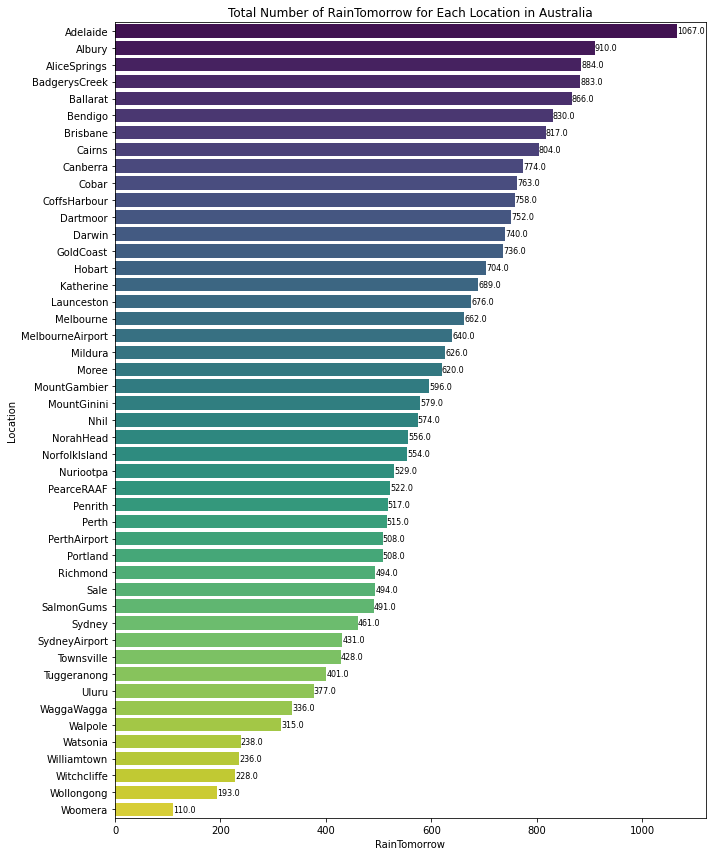

In [37]:
plt.figure(figsize=(10, 12))
p = sns.barplot(x='RainTomorrow', 
            y=df_loc.index, 
            data=df_loc.sort_values('RainTomorrow', ascending=False), 
            orient='h',palette='viridis'
           )

plt.title('Total Number of RainTomorrow for Each Location in Australia')
plt.tight_layout()
for container in p.containers:
    p.bar_label(container,size=8,fmt='%.1f')

Berdasarkan plot diatas Adelaide memiliki potensi RainTomorrow yang paling tinggi dibandingkan dengan Woomera yang memiliki potensi RainTomorrow yang rendah

<AxesSubplot:title={'center':'WindGustSpeed'}, xlabel='WindGustSpeed', ylabel='Count'>

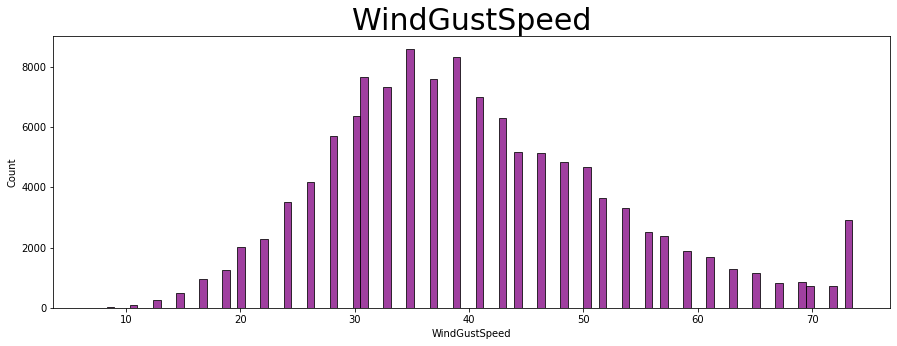

In [38]:
#show distribution of WindGustSpeed
bins = np.linspace(data['WindGustSpeed'].min(),data['WindGustSpeed'].max(),100)
count=data['WindGustSpeed'].value_counts()
plt.figure(figsize=(15,5))
plt.title('WindGustSpeed',fontsize=30)
sns.histplot(x='WindGustSpeed',data=data,bins=bins, color='purple')

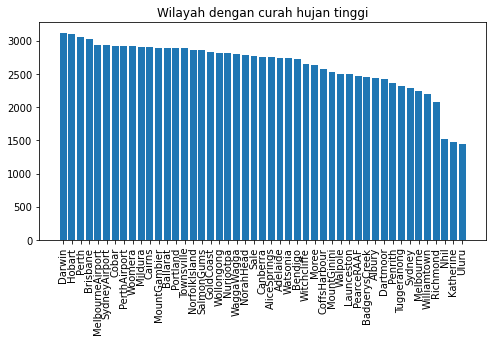

In [39]:
plt.figure(figsize=[8,4])
plt.bar(data['Location'].value_counts().index, data['Location'].value_counts())
plt.xticks(rotation=90)
plt.title('Wilayah dengan curah hujan tinggi')
plt.show()

# Preprocessing

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [41]:
# Mengubah kolom location menjadi kolom numerik
data.Location = le.fit_transform(data.Location)

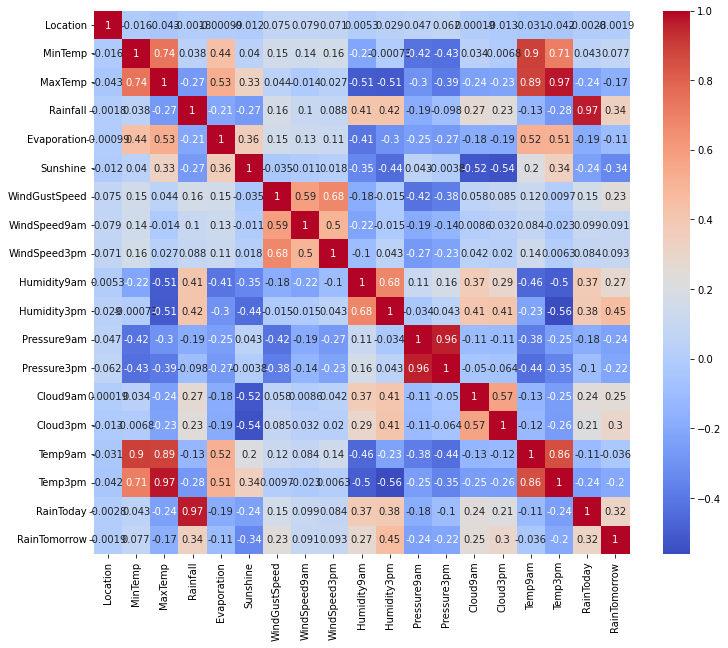

In [42]:
correlation = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), cmap='coolwarm',annot=True)
plt.show()

Berdasarkan Heatmap terlihat bahwa MaxTemp dan Temp3pm serta Pressure9am dan Pressure3pm memiliki korelasi yang tinggi yaitu secara berturut-turut sebesar 0,98 dan 0,96. Oleh karena itu, salah satu dari dua kolom yang yang memiliki korelasi harus dihapus

In [43]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,1,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,1,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,1,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,1,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [44]:
data.drop(['Temp3pm','Pressure3pm'], axis=1, inplace=True)

In [45]:
data.reset_index(drop=True, inplace=True)

In [46]:
# Melihat unique values dan mengkonversi ke integer menggunakan pd.get_dummies()
categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
for col in categorical_columns:
    print(np.unique(data[col]))
# transform the categorical columns
df = pd.get_dummies(data, columns=categorical_columns)
df.iloc[4:9]

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,1,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,...,0,0,0,0,0,0,0,0,0,0
5,1,14.6,29.7,0.2,4.8,8.4,56.0,19.0,24.0,55.0,...,0,0,0,0,0,0,0,1,0,0
6,1,14.3,25.0,0.0,4.8,8.4,50.0,20.0,24.0,49.0,...,0,0,0,0,0,0,1,0,0,0
7,1,7.7,26.7,0.0,4.8,8.4,35.0,6.0,17.0,48.0,...,0,0,0,0,1,0,0,0,0,0
8,1,9.7,31.9,0.0,4.8,8.4,73.5,7.0,28.0,42.0,...,0,0,0,1,0,0,0,0,0,0


In [47]:
#next step is to standardize our data - using MinMaxScaler
scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)
df.iloc[4:10]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,0.021739,0.613208,0.701323,0.5,0.482143,0.57931,0.511278,0.144928,0.467532,0.82,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.021739,0.544811,0.652174,0.1,0.482143,0.57931,0.736842,0.492754,0.571429,0.55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.021739,0.537736,0.563327,0.0,0.482143,0.57931,0.646617,0.521739,0.571429,0.49,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.021739,0.382075,0.595463,0.0,0.482143,0.57931,0.421053,0.115942,0.389610,0.48,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.021739,0.429245,0.693762,0.0,0.482143,0.57931,1.000000,0.144928,0.675325,0.42,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.021739,0.509434,0.659735,0.7,0.482143,0.57931,0.315789,0.376812,0.233766,0.58,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modeling

In [48]:
x_transform = df.drop(["RainTomorrow"], axis=1)
Y= df['RainTomorrow']

In [49]:
# feature selection untuk logistic regression
sfs = SFS(LogisticRegression(),
          n_features_to_select=10)

In [50]:
X_fit=df[['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'RainToday']]

In [51]:
X_train, X_test, y_train, y_test= train_test_split(X_fit, Y, test_size=0.20)

## 1. Logistic Regression

In [52]:
# Logistic Regression
logreg = LogisticRegression(C=0.8, class_weight='balanced', solver='liblinear', random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(C=0.8, class_weight='balanced', random_state=0,
                   solver='liblinear')

In [53]:
y_pred_lr = logreg.predict(X_test)
roc_auc = roc_auc_score(y_test,y_pred_lr)

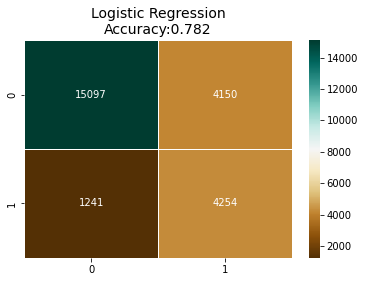

In [54]:
cm_dct = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_dct, annot=True, fmt="d", linewidths=.5, cmap = 'BrBG',)
plt.title("Logistic Regression\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_lr)), fontsize=14)

# Save Plot
plt.savefig("confusion_matrix_6.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

In [55]:
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

print(f'Accuracy Score: {accuracy_score(y_test, y_pred_lr)}')
print(f'Precision Score: {precision_score(y_test,y_pred_lr)}')
print(f'Recall Score: {recall_score(y_test,y_pred_lr)}')
print("F1 Score:",f1_score(y_test,y_pred_lr))
print("roc_auc_score: ", roc_auc_score(y_test, y_pred_lr))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.78      0.85     19247
         1.0       0.51      0.77      0.61      5495

    accuracy                           0.78     24742
   macro avg       0.72      0.78      0.73     24742
weighted avg       0.83      0.78      0.80     24742

Accuracy Score: 0.7821113895400533
Precision Score: 0.5061875297477392
Recall Score: 0.7741583257506824
F1 Score: 0.6121303690913016
roc_auc_score:  0.7792701536791028


## 2. RandomForestClassifier

In [56]:
RF = RandomForestClassifier(n_estimators=100, max_depth=4,random_state=0)
RF.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [57]:
y_pred_rf = RF.predict(X_test)
score = accuracy_score(y_test,y_pred_rf)
roc_auc = roc_auc_score(y_test,y_pred_rf)

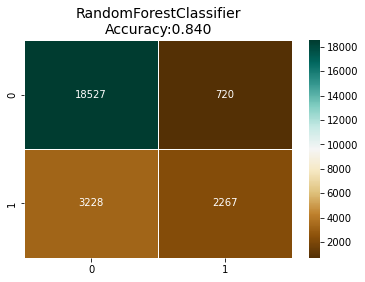

In [58]:
cm_dct = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_dct, annot=True, fmt="d", linewidths=.5, cmap = 'BrBG',)
plt.title("RandomForestClassifier\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_rf)), fontsize=14)

# Save Plot
plt.savefig("confusion_matrix_6.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

In [59]:
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

print(f'Accuracy Score: {accuracy_score(y_test, y_pred_rf)}')
print(f'Precision Score: {precision_score(y_test,y_pred_rf)}')
print(f'Recall Score: {recall_score(y_test,y_pred_rf)}')
print("F1 Score:",f1_score(y_test,y_pred_rf))
print("roc_auc_score: ", roc_auc_score(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     19247
         1.0       0.76      0.41      0.53      5495

    accuracy                           0.84     24742
   macro avg       0.81      0.69      0.72     24742
weighted avg       0.83      0.84      0.82     24742

Accuracy Score: 0.8404332713604398
Precision Score: 0.7589554737194509
Recall Score: 0.41255686988171064
F1 Score: 0.5345437396840367
roc_auc_score:  0.6875742212971705


## 3. DecisionTree

In [60]:
DT = DecisionTreeClassifier(random_state=0)
DT.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [61]:
y_pred_dt = DT.predict(X_test)
score = accuracy_score(y_test,y_pred_dt)
roc_auc = roc_auc_score(y_test,y_pred_dt)

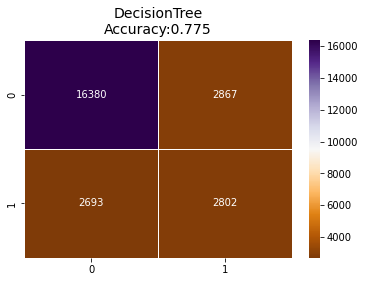

In [62]:
cm_dct = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dct, annot=True, fmt="d", linewidths=.5, cmap = 'PuOr',)
plt.title("DecisionTree\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_dt)), fontsize=14)

# Save Plot
plt.savefig("confusion_matrix_6.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

In [63]:
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

print(f'Accuracy Score: {accuracy_score(y_test, y_pred_dt)}')
print(f'Precision Score: {precision_score(y_test,y_pred_dt)}')
print(f'Recall Score: {recall_score(y_test,y_pred_dt)}')
print("F1 Score:",f1_score(y_test,y_pred_dt))
print("roc_auc_score: ", roc_auc_score(y_test, y_pred_dt))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.85      0.85     19247
         1.0       0.49      0.51      0.50      5495

    accuracy                           0.78     24742
   macro avg       0.68      0.68      0.68     24742
weighted avg       0.78      0.78      0.78     24742

Accuracy Score: 0.7752808988764045
Precision Score: 0.49426706650202856
Recall Score: 0.5099181073703367
F1 Score: 0.5019706198495163
roc_auc_score:  0.680479914078996


## 4. SupportVectorMachine(SVM)

Untuk Model SVM ketika dirun cukup lama sekitar 5menit

In [64]:
SVM = svm.SVC(class_weight='balanced', kernel='linear')
SVM.fit(X_train,y_train)

SVC(class_weight='balanced', kernel='linear')

In [65]:
y_pred_svm = SVM.predict(X_test)
score = accuracy_score(y_test,y_pred_svm)
roc_auc = roc_auc_score(y_test,y_pred_svm)

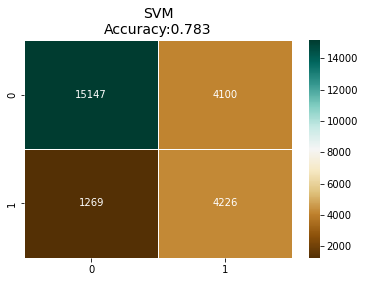

In [66]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", linewidths=.5, cmap = 'BrBG',)
plt.title("SVM\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_svm)), fontsize=14)

# Save Plot
plt.savefig("confusion_matrix_3.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

In [67]:
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

#Ringkasan Evaluasi Model Support Vector Machine
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_svm)}')
print(f'Precision Score: {precision_score(y_test,y_pred_svm)}')
print(f'Recall Score: {recall_score(y_test,y_pred_svm)}')
print("F1 Score:",f1_score(y_test,y_pred_svm))
print("roc_auc_score: ", roc_auc_score(y_test, y_pred_svm))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.79      0.85     19247
         1.0       0.51      0.77      0.61      5495

    accuracy                           0.78     24742
   macro avg       0.72      0.78      0.73     24742
weighted avg       0.83      0.78      0.80     24742

Accuracy Score: 0.7830005658394633
Precision Score: 0.5075666586596205
Recall Score: 0.7690627843494086
F1 Score: 0.611533174155271
roc_auc_score:  0.7780212867037217


# Kesimpulan

In [68]:
# Menampilkan hasil test score dari LogisticRegression, RandomForest, DecisionTree, dan SVM
# Menggunakan accuracy score 
print('Menampilkan nilai model dengan Accuracy score :')
print('')
print('LogisticRegression Test Score        : ' , logreg.score(X_test, y_test))
print('RandomForest Test Score              : ' , RF.score(X_test, y_test))
print('DecisionTree Test Score              : ' , DT.score(X_test, y_test))
print(f'Support Vector Machine Test Score   :   {accuracy_score(y_test, y_pred_svm)}')


Menampilkan nilai model dengan Accuracy score :

LogisticRegression Test Score        :  0.7821113895400533
RandomForest Test Score              :  0.8404332713604398
DecisionTree Test Score              :  0.7752808988764045
Support Vector Machine Test Score   :   0.7830005658394633


In [69]:
# Menampilkan hasil test score dari LogisticRegression, RandomForest, DecisionTree, dan SVM
# Menggunakan roc auc score dari y_test dan y_pred
print('Menampilkan nilai model dengan roc auc score :')
print('')
print("roc_auc_score dari Logistic Regression   : ", roc_auc_score(y_test, y_pred_lr))
print("roc_auc_score dari RandomForest          : ", roc_auc_score(y_test, y_pred_rf))
print("roc_auc_score dari DecissionTree         : ", roc_auc_score(y_test, y_pred_dt))
print("roc_auc_score dari SVM                   : ", roc_auc_score(y_test, y_pred_svm))

Menampilkan nilai model dengan roc auc score :

roc_auc_score dari Logistic Regression   :  0.7792701536791028
roc_auc_score dari RandomForest          :  0.6875742212971705
roc_auc_score dari DecissionTree         :  0.680479914078996
roc_auc_score dari SVM                   :  0.7780212867037217


Setelah melakukanBerdasarkan model diatas dapat didapatkan hasil dari 2 Test, model yang menggunakan scoring dengan Accuracy score didapatkan nilai dari model yang paling sempurna adalah RandomForest dengan score 0.84, sedangkan jika mengacu pada Tugas Final Project 2, yang hanya menggunakan model Logistic Regression dan SVM maka nilai dari model SVM lebih unggul sedikit. Lalu untuk Scorring dengan roc_auc_score model Logistic Regression lebih unggul dari perolehan nilai